<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/MobileNets_Efficient_Convolutional_Neural_Networks_for_Mobile_Vision_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications**

논문 링크: https://arxiv.org/abs/1704.04861

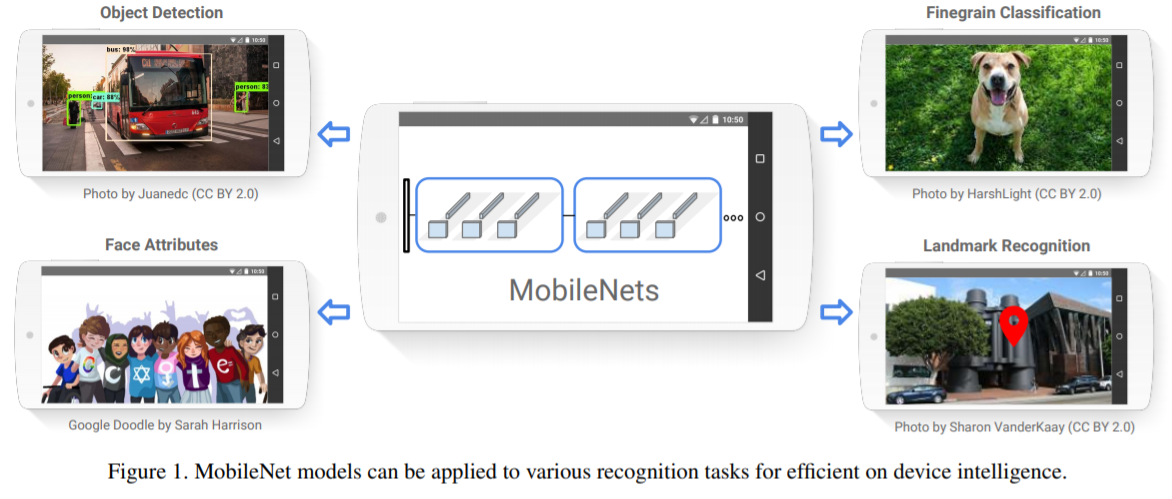

MobileNet은 이름에서부터 느낌이 오는데 바로 모바일 환경에서도 사용할 수 있는 가볍고 효율적인 model이다.

## **MobileNet 구조**

### **Depthwise Separable Convolution**

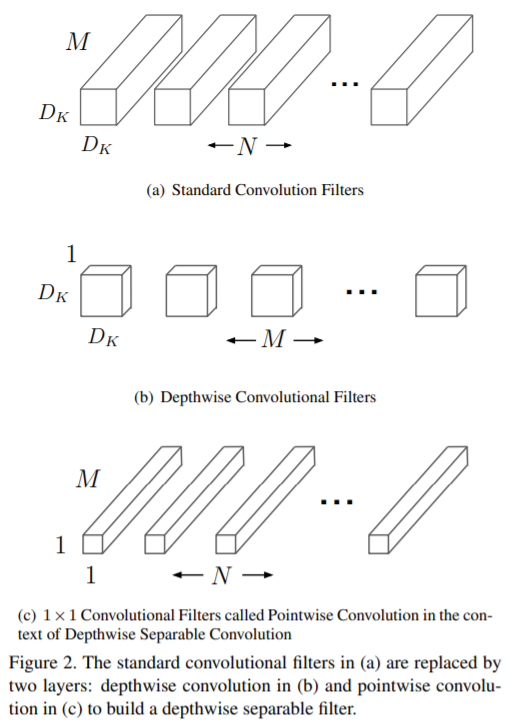

먼저 가벼운 모델을 만들기 위해 위의 그림 Figure 2의 (a) 부분에 있는 기존의 standard convolution의 기능을 쪼개어 (b) 부분의 Depthwise convolution과 (c) 부분의 pointwise convolution으로 나누었다.

D_F x D_F x M 크기의 feature map F를 kernel size가 K인 convolution filter에 적용시켜 D_K x D_K x N 크기의 feature map G을 얻었다고 가정했을때

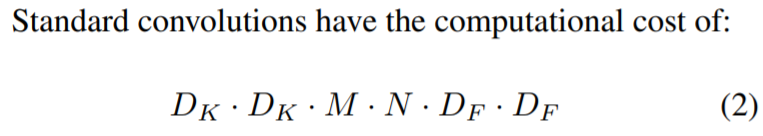

기존의 standard convolution layer의 cost는 D_K x D_K x M x N x D_F x D_F가 된다.

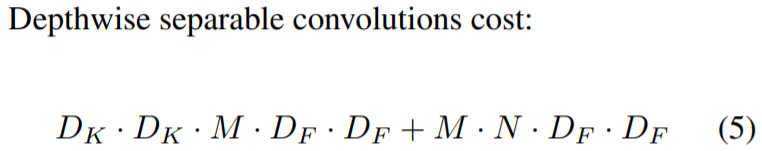

그리고 본 논문에서 제안하는 Depthwise separable convolution(depthwise convolution + 1 × 1 pointwise convolution)의 cost는 위와 같이 된다.

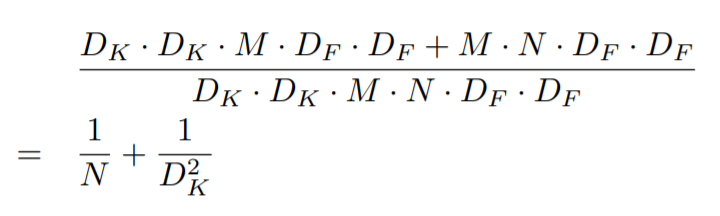

기존의 standard convolution과 depthwise separable convolution의 cost를 비교한 식이 바로 위의 식이다. 3 x 3 kernel size 기준으로 8 ~ 9배 가벼워졌다.

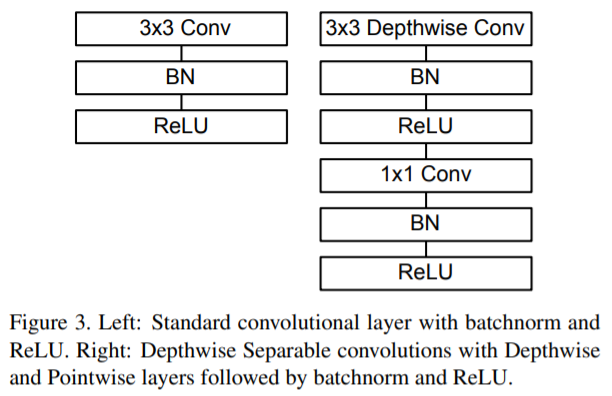

위의 그림 Figure 3을 보면 기존의 standard convolution layer + batchnorm + ReLU를 오른쪽과 같이 변형해서 사용하였다.

### **Architecture**

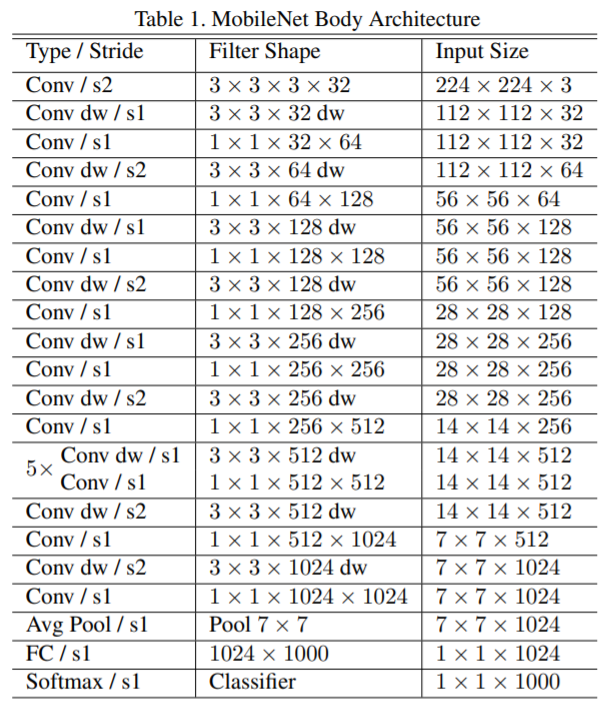

그리고 MobileNet의 자세한 구조는 위의 표 Table 1과 같다.

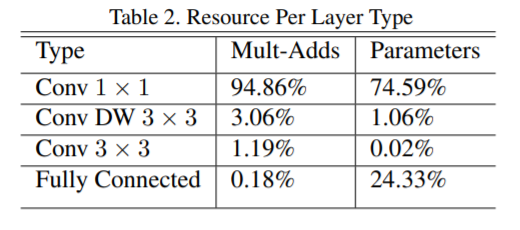

위의 표 Table 2를 보면 MobileNet은 계산 시간의 95%를 1 × 1 Conv에 소비하며 parameters의 75 %도 포함한다.

### **Width Multiplier: Thinner Models**

또한 본 논문에서는 Width Multiplier(α)라고 불리는 input channel과 output channel을 조절해주는 hyper-parameter를 추가하였다. α ∈ (0, 1]로 논문에서는 α의 값을 각각 1, 0.75, 0.5, 0.25로 설정했다.

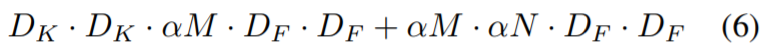

α의 기본값은 1이며, 위의 식을 보면 알겠지만 cost를 α^2만큼 줄어준다.

### **Resolution Multiplier: Reduced Representation**

Width Multiplier α 뿐만아니라 본 논문에서는 resolution multiplier ρ라고 불리는 input image의 size를 조절해주는 hyper-parameter도 추가하였다.

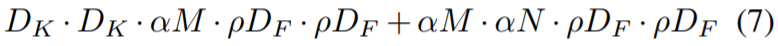

기본적으로 보통 input resolution이 224, 192, 160, 128를 가지도록 설정을 했고, 위의 식을 보면 알겠지만 cost를 ρ^2만큼 줄어준다.

## **Experiments**

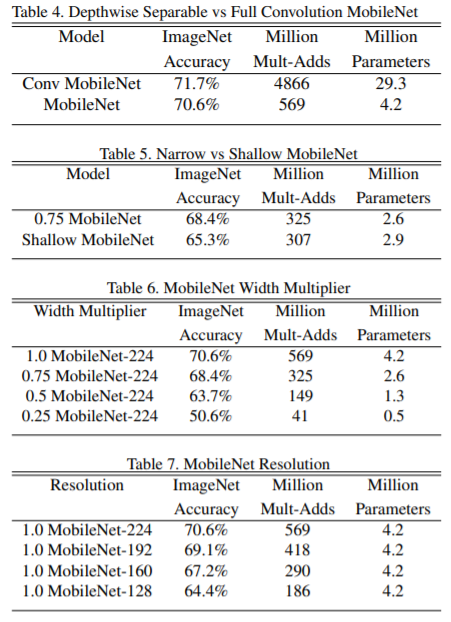

위의 표들은 여러 실험을 통해 accuracy, mult-adds, parameters이다. 먼저, Table 4를 보면 기존의 standard convolution과 depthwise separable convolution의 결과를 비교한 것이다. accuracy는 약 1%가량맊게 차이가 안나지만, parameter는 매우 큰 차이가 나는 것을 알 수 있다.

Table 5를 보면 Narrow와 Shallow의 차이를 알 수 있다. 이때, Narrow는 Width Multiplier를 조절하여 channel수를 조절 한 것이고, Shallow는 단순히 layer수를 줄인 것이다. parameter를 비슷하게 맞추어놓고 비교했을때, Narrow한 모델이 3% 정도 성능이 더 좋게 나온 것을 알 수 있다.

Table 6과 Table 7을 보면 위에서 설명한 Width Multiplier α와 resolution multiplier ρ를 조절하여 성능을 비교한 것이다.  당연하게도 channel 수를 감소시키면, parameter와 연산량이 줄어들지만 그와 비례해서 Accuracy도 감소한다. Resolution의 경우도 마찬가지로 resolution이 감소하면 연산량이 감소하게 되며 accuracy 또한 감소한다.

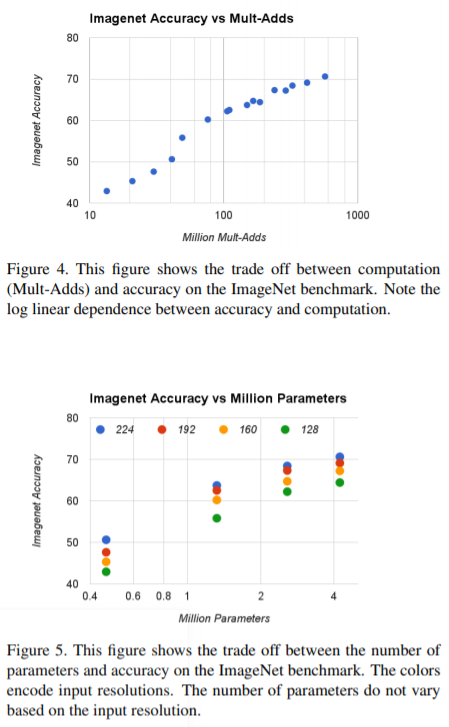

위의 그림 Figure 4와 Figure 5에 나와있는 두 그래프는 ImageNet dataset에 대해 각각 accuracy와 연산량의 관계와 accuracy와 parameter수의 관계를 나타낸 것이다.

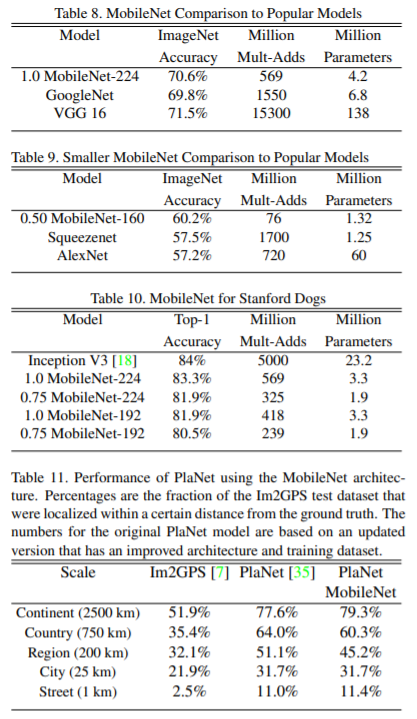

위의 표 Table 8은 MobileNet, GoogleNet, VGG16의 성능을 비교한 것이다 MobileNet은 VGG16만큼 정확하지만 parameter가 32배 더 작으며 연산량은 27배 더 적다. 그리고 GoogleNet보다 더 정확하면서 연산량은 2.5배 이상 적다.

위의 표 Table 9는 MobileNet(α = 0.5, 160 × 160)과 다른 model들과 비교한 것이다. MobileNet은 AlexNet보다 parameter는 45배 작으며 연산량은 9.4배 적으면서도 4%만큼 더 높은 accuracy를 가진다. 또한 동일한 크기로 Squeezenet보다 4% 더 우수하고 연산량은 22배 더 적다.

위의 표 Table 10은 Stanford Dogs dataset에 대하여 hyper-parameter를 조정한 MobileNet들과 Inception V3을 비교한 결과다. 이 또한 accuracy는 비슷하면서도 parameter과 연산량은 크게 차이가 나는 것을 알 수 있다.

위의 표 Table 11을 보면 MobileNet이 훨씬 더 작은 model임에도 불구하고 PlaNet에 비해 약간 저하된 성능을 제공합니다. 하지만 Im2GPS보다는 성능이 훨씬 좋은 것을 알 수 있다.